# <center> Remapped Variables into temperature space </center>

The heat budget can written in the familiar form:
\begin{equation}
\frac{\partial T}{\partial t} + \nabla \cdot \textbf{u}T = \frac{\partial Q}{\partial z}
\end{equation}
 Where Q is the surface heat flux. Using a Reynolds decomposition to split the budget into eddy and mean transport terms gives:
 
\begin{equation}
\frac{\partial \overline{v}\overline{T}}{\partial y } + \frac{\partial \overline{w}\overline{T}}{\partial z } + \frac{\partial \overline{v'T'}}{\partial y } + \frac{\partial \overline{w'T'}}{\partial z } = \frac{\partial Q}{\partial z}.
\end{equation}


The $\overline{v'T'}$ and $\overline{w'T'}$ terms can be decomposed into an along-isopycnal term and a remaining vertical component:

\begin{equation}
\left(\overline{v'T'},\overline{w'T'}\right) =  \underbrace{\left(\overline{v'T'}S_p, \overline{w'T'}\right)}_\text{along $\overline{T}$}  + \underbrace{\left(0,\overline{w'T'}- \overline{v'T'}S_p \right)}_\text{remaining vertical}, 
\end{equation}


\begin{equation}
\frac{\partial \overline{v}\overline{T}}{\partial y } + \frac{\partial\overline{w} \overline{T}}{\partial z } + \frac{\partial \overline{v'T'}S_p}{\partial z } + \frac{\partial \overline{v'T'}}{\partial y } = \frac{\partial Q}{\partial z}+ \frac{\partial \left( \overline{w'T'}-\overline{v'T'}S_p \right)}{\partial z }.
\end{equation}


Putting in terms of streamfunctions:


\begin{equation}
v^* = \frac{\partial \Psi ^*}{\partial z}, \quad w^* = \frac{\partial \Psi ^*}{\partial y} \\ \, \text{ and } \, \\
\overline{v} = \frac{\partial \overline{\Psi } }{\partial z}, \quad \overline {w} = \frac{\partial \overline{\Psi} }{\partial y}.
\end{equation}


\begin{equation}
\frac{\partial \overline{\Psi } }{\partial z}\frac{ \partial \overline{T}}{\partial y } + \frac{\partial \overline{\Psi} }{\partial y} \frac{\partial \overline{T}}{\partial z } + \frac{\partial \Psi ^*}{\partial y}\frac{\partial \overline{T}}{\partial z } + \frac{\partial \Psi ^*}{\partial z}\frac{\partial \overline{T}}{\partial y } = \frac{\partial Q}{\partial z}+ \frac{\partial \left( \overline{w'T'}-\overline{v'T'}S_p \right)}{\partial z }.
\end{equation}


Residual mean Theroy:


\begin{equation}
\frac{\partial \Psi _{res} }{\partial z} \frac{\partial \overline{T}}{\partial y } + \frac{\partial \Psi _{res} }{\partial y} \frac{\partial \overline{T}}{\partial z } = \frac{\partial Q}{\partial z}+ \frac{\partial \left( \overline{w'T'}-\overline{v'T'}S_p \right)}{\partial z }.
\end{equation}

Remembering that:

\begin{equation}
\psi ^* = \frac{\overline{w'T'}}{T_{y}}, \quad \quad \psi ^* = \frac{\overline{v'T'}}{T_{z}},
\end{equation}


Is only true  where eddies are adiabatic:



\begin{equation}
\frac{\partial \Psi _{res} }{\partial z} \frac{\partial \overline{T}}{\partial y } + \frac{\partial \Psi _{res} }{\partial y} \frac{\partial \overline{T}}{\partial z } = \frac{\partial Q}{\partial z}+ \frac{\partial \left( \overline{w'T'}-\Psi ^* T_z S_p \right)}{\partial z }.
\end{equation}


\begin{equation}
S_p = \frac{\frac{\partial T}{\partial y}}{\frac{\partial T}{\partial z}} 
\end{equation}

so simplifies to:


\begin{equation}
\frac{\partial \Psi _{res} }{\partial z} \frac{\partial \overline{T}}{\partial y } + \frac{\partial \Psi _{res} }{\partial y} \frac{\partial \overline{T}}{\partial z } = \frac{\partial Q}{\partial z}+ \frac{\partial \left( \overline{w'T'}-\Psi ^* T_y \right)}{\partial z }.
\end{equation}



\begin{equation}
S_p = \frac{\partial z}{\partial y} = \frac{Th}{\partial y}
\end{equation}

where Th is layer thickness.


I want to remap into y,T space so we're gonna have to obtain $T_y$ through the chain rule:

\begin{equation}
\frac{ \partial T}{\partial y} = \frac{ \partial z}{\partial y} . \frac{ \partial T}{\partial z}.
\end{equation}

Great we have discrete values already for $\partial T$ and $\partial z$ thats are layers bounds and our layer thickness!

substiuting back in to diabatic eddies deffiniton

\begin{equation}
DE = \overline{w'T'}(y,T) -\Psi ^*.\frac{Th}{\Delta y}. \frac{\Delta T}{Th}
\end{equation}



In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
from pylab import *
sys.path.append('/noc/users/hb1g13/Python/python_functions/')
import SG as SG
import useful as hb
import layers_calc_numba
sys.path.append('/noc/users/hb1g13/Python/python_functions/MITgcmUtils/')
import utils
%matplotlib inline

In [3]:
# Some parameters
Full = 'N'  # 9 Pannels isn't ideal for presentations N option give 4 plots

In [4]:
if Full == 'N':
    tau = ['3', '300', '3000', 'Closed']
elif Full == 'Extremes':
    tau = ['3','Closed']
else:
    tau = ['3', '10', '30', '100', '300',
           '1000', '3000', '10000', 'Closed']
Figletter = ['a) ','b) ','c) ','d) ','e)','f)','g)','h)','j)']
# Path root
x = '/noc/msm/scratch/students/hb1g13/Mobilis'
# Now Make file structure
check = 0
runs = []
for i in range(len(tau)):
    flist = x+'/'+str(tau[i])+'daynokpp/Remapped.nc'
    if not os.path.exists(flist):
        print ' WARNING: '+flist+' does not exist! (skipping this tau...)'
        check += 0
    else:
        check += 1
        runs.append(i)
Runs=np.array(runs)

#Eddy ways#


The term $W'T'$ can be calulated:

1. $\overline{WT}$(y,T) - W(y,T) T
2. $W'T'$(y,T) 
3. $\overline{WT}$(y,T) - $\overline{W}\overline{T}$(y,T)


/noc/users/hb1g13/anaconda/lib/python2.7/site-packages/numpy/ma/core.py:4139: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


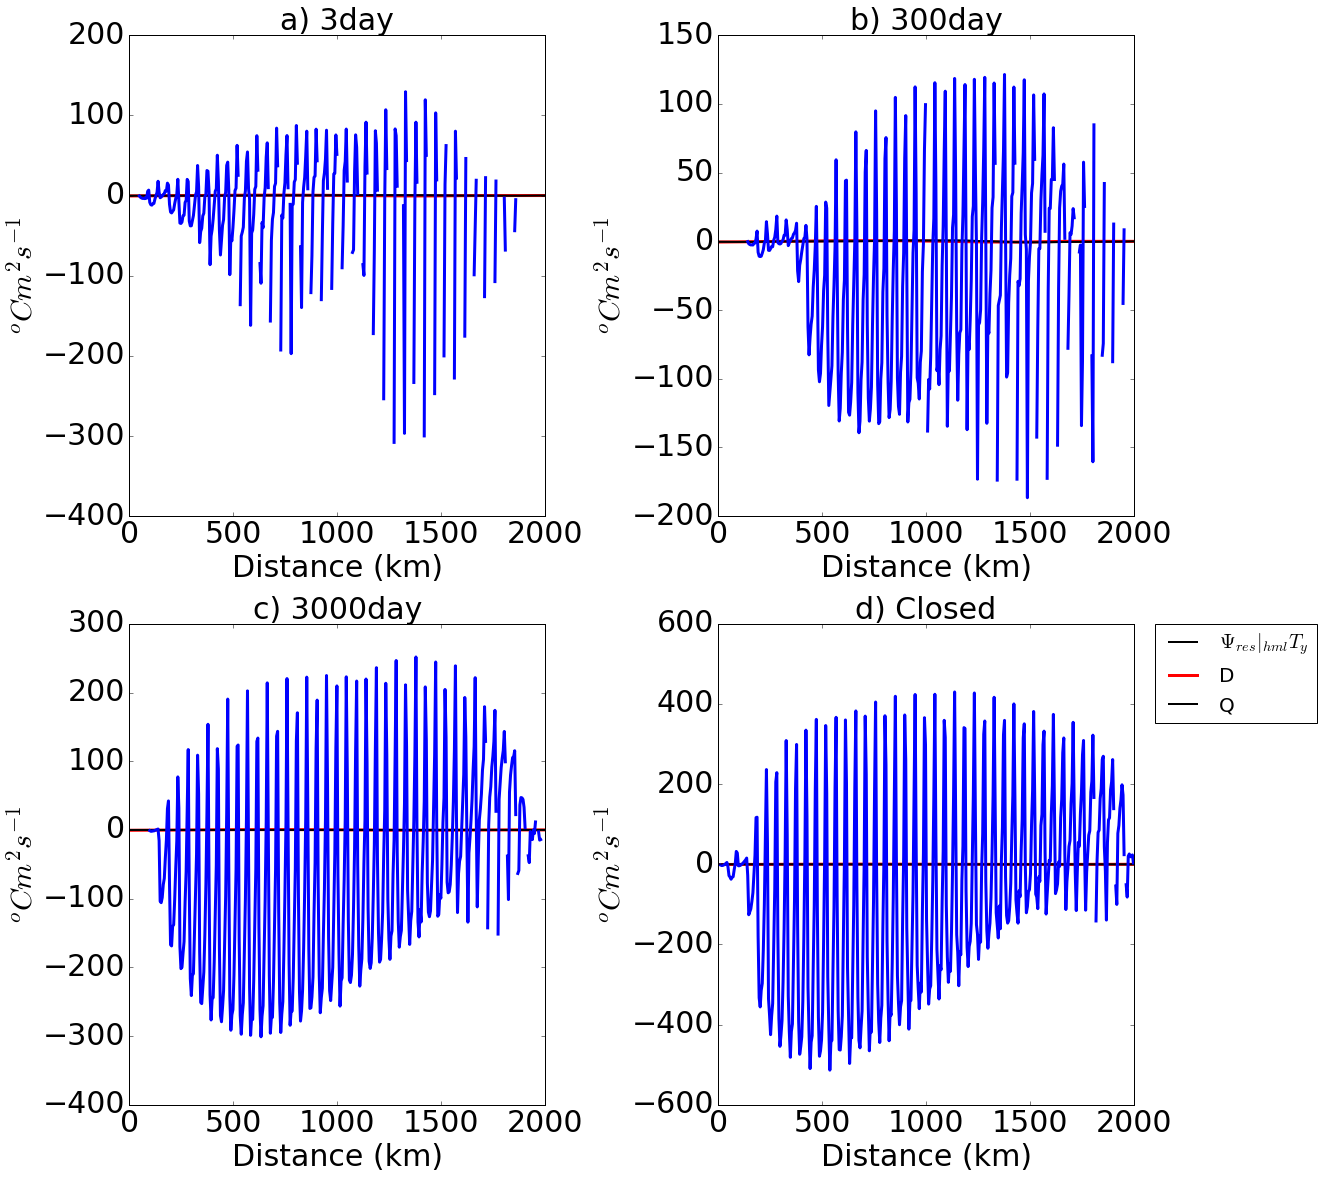

In [6]:
# Method 2
fig = plt.figure(figsize=(16.5, 16.5))
for i in range(len(Runs)):
    ax = fig.add_subplot(2, 2, i+1)
    # File
    fname = x+'/'+str(tau[Runs[i]])+'daynokpp/'
    c = utils.ChannelSetup(output_dir=str(fname))
    g = layers_calc_numba.LayersComputer(c)
    # ROC 
    psi = c.get_psi_iso()
    # Layer probability mask 
    PI = c.mnc('PSI.nc',"LaPs1TH").mean(axis=2)
    PI = ma.masked_array(PI,PI<0.95)
    #psi = ma.masked_array(psi, PI < .98 )
    # Depths
    th = c.mnc('PSI.nc',"LaHs1TH").mean(axis=2)
    depths = np.cumsum(th[::-1],axis=0)[::-1]
    
    # Find Max ROC and depth of diabatic layer
    DDL = np.zeros(len(c.yc)) 
    ROC = np.zeros(len(c.yc)) 
    TL = np.zeros(len(c.yc))
    for jj in range(len(c.yc)):
        if ma.all(PI[:,jj]  == 1)  or np.all(psi[:,jj] == -0) or PI[:,jj].mask.all():
            continue
        indx = ma.nonzero(PI[:,jj]<1)[0]
        b = indx[np.nonzero(indx>3)[0]]
        if len(b)>=2 and (b[1]-b[0])>1:
            a = b[1]
        else:
            a = b[0]
        if a<41 and depths[a-1,jj] - depths[a,jj] > 150:
            a = a-1
        DDL[jj] = depths[a,jj]
        TL[jj] = np.sum(g.glvl[a::]*th[a::,jj])/np.sum(th[a::,jj])
        if psi[a,jj]/10**6 > 1.0:
            a = a-1
        ROC[jj] = psi[a,jj]
        
    # HEAT FLUX
    Q = c.mnc('SURF.nc', 'oceQnet').mean(axis=0).mean(axis=1)
    Psipred = (Q)/(1000 * 3985)
   
    #Diabatic Eddy
    D = c.mnc_tl('DEyz2yT.nc',"DE_l").T
    TH = c.mnc_tl('Remapped.nc',"th").mean(axis=2)
    depths_2 = np.cumsum(TH[::-1],axis=0)[::-1]

    

    
    
    # Diabatic eddy
    

    D_dl = np.zeros(len(c.yc)) 
    for jj in range(len(c.yc)):
        if ma.all(PI[:,jj]  == 1)  or np.all(psi[:,jj] == -0) or PI[:,jj].mask.all():
            continue
        D_dl[jj] = np.sum(D[np.where(depths_2[:,jj]==hb.find_nearest(depths_2[:,jj],DDL[jj]))[0][0]::,jj])/DDL[jj]
    
    # Horizontal temperature gradient in diabatic layer
    
    AvD = np.mean(DDL)
    ind = np.where(c.zc==hb.find_nearest(c.zc,-AvD))[0][0]
    Temp = c.mnc('Tav.nc','THETA').mean(axis=2)
    Ty = c.ddy_cgrid_centered(Temp)
    Ty_dl = Ty[ind,:]
    
    
    
    p = plt.plot(c.yc/1000, SG.savitzky_golay(ROC,41,1)/10**6, 'k', linewidth=2)
    q = plt.plot(c.yc/1000, (Psipred/c.dzc[0])*10**6, 'r', linewidth=3)
    p = plt.plot(c.yc/1000, SG.savitzky_golay(ROC,41,1)/10**6, 'k', linewidth=2)
    r = plt.plot(c.yc/1000, ((D.sum(axis=0))*10**6), 'b', linewidth=3)

    ax.set_title(str(Figletter[Runs[i]])+str(tau[Runs[i]])+'day', fontsize=30)
    if str(tau[Runs[i]]) == 'Closed':
        ax.set_title(str(Figletter[Runs[i]])+str(tau[Runs[i]]), fontsize=30)
    ax.set_xlabel('Distance (km)', fontsize=30)
    ax.set_ylabel(r'$^oC m^2 s^{-1} $', fontsize=30)
    ax.tick_params(axis='both', which='major', labelsize=30)
plt.tight_layout()
lgd=plt.legend([r'$\Psi_{res}|_{hml}T_y$','D','Q'],bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,fontsize=20)

In [ ]:
plo